In [2]:
##################실습 3-1
##################데이터 준비 및 확인


#데이터 불러오기
import pandas as pd
import numpy as np
BT= pd.read_csv("BUYTEST.csv")

#기초통계량 확인하기
BT.describe()

,RESPOND,CLIMATE,BUY6,BUY12,BUY18,BUY24,DISCBUY,RETURN24,COA6,C1,C2,C3,C4,C5,C6,C7,PURCHTOT
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.076700,20.343000,0.128300,0.209900,0.347100,254.045100,0.270000,0.070900,0.028900,0.155300,1.01220,0.563500,0.53730,0.35400,3.491600,0.174500,6.288400
std,0.266128,6.108689,0.346195,0.436648,0.570661,153.422061,0.443982,0.256671,0.167534,1.488087,6.28347,4.240303,4.54936,2.92789,15.493222,1.863437,27.276327
min,0.000000,10.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,0.000000,149.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,20.000000,0.000000,0.000000,0.000000,214.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
75%,0.000000,20.000000,0.000000,0.000000,1.000000,312.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
max,1.000000,30.000000,2.000000,3.000000,3.000000,1253.000000,1.000000,1.000000,1.000000,46.000000,115.00000,127.000000,125.00000,90.00000,249.000000,62.000000,446.000000


In [3]:
#히스토그램 그리기 (오ㅐ 칼럼별로 다 안뜨지...????;;;)
BT.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000184A5171780>,
      dtype=object)

In [4]:
#결측치 확인
BT.isnull().sum()  #....??? 왜 AGE 등등 결측치 0이라고 나오지...?

ID            0
RESPOND       0
AGE           0
INCOME        0
SEX         234
MARRIED       0
FICO          0
OWNHOME       0
LOC           0
CLIMATE       0
BUY6          0
BUY12         0
BUY18         0
BUY24         0
ORGSRC      521
DISCBUY       0
RETURN24      0
COA6          0
C1            0
C2            0
C3            0
C4            0
C5            0
C6            0
C7            0
PURCHTOT      0
dtype: int64

In [5]:
#결측값에 무슨 문제가 있나 확인해보자
BT[0:10]
#잉,,? NaN은 결측값이라고 인식하는데 'null'은 인식 못하네...?

,ID,RESPOND,AGE,INCOME,SEX,MARRIED,FICO,OWNHOME,LOC,CLIMATE,...,RETURN24,COA6,C1,C2,C3,C4,C5,C6,C7,PURCHTOT
0,1371057,0,71,67,M,1,719,0,A,10,...,0,0,0,0,0,0,0,0,0,0
1,2093270,0,53,72,M,1,751,0,A,10,...,0,0,0,0,0,0,0,0,0,0
2,2783726,0,53,70,F,1,725,0,A,10,...,0,0,0,0,0,0,0,0,0,0
3,10800860,0,45,56,F,0,684,0,A,10,...,0,0,0,0,0,0,0,0,0,0
4,14577797,0,32,66,F,0,651,0,A,10,...,0,0,0,0,0,0,0,0,0,0
5,15884859,0,35,48,F,0,691,1,A,10,...,1,0,0,0,0,0,0,0,0,0
6,17131376,0,43,49,F,0,694,1,A,10,...,1,0,0,0,0,0,0,0,0,0
7,18674857,0,39,64,M,0,659,0,A,10,...,0,0,0,0,0,0,0,0,0,0
8,19417226,0,66,65,M,0,692,0,A,10,...,0,0,0,0,0,0,0,0,0,0
9,21786286,0,$null$,$null$,NaN,$null$,707,$null$,A,10,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#null이라고 써있는 스트링 값 변환하기(갓두솔,,,)
compare_str = BT['AGE'][9]
for col in BT.columns:
    for i in range(len(BT[col])):
        if BT[col].values[i] == compare_str:
            BT[col].values[i] = np.nan
#근데 그러면 이 loop를 한 번 돌면 compare_str이 NaN이 되니까 다음 'null' != compare_str 되는거 아닌가?
#아니어따~! deep copy 공부하기~!

#잘 변환됐나 확인
BT[0:10]

,ID,RESPOND,AGE,INCOME,SEX,MARRIED,FICO,OWNHOME,LOC,CLIMATE,...,RETURN24,COA6,C1,C2,C3,C4,C5,C6,C7,PURCHTOT
0,1371057,0,71,67,M,1,719,0,A,10,...,0,0,0,0,0,0,0,0,0,0
1,2093270,0,53,72,M,1,751,0,A,10,...,0,0,0,0,0,0,0,0,0,0
2,2783726,0,53,70,F,1,725,0,A,10,...,0,0,0,0,0,0,0,0,0,0
3,10800860,0,45,56,F,0,684,0,A,10,...,0,0,0,0,0,0,0,0,0,0
4,14577797,0,32,66,F,0,651,0,A,10,...,0,0,0,0,0,0,0,0,0,0
5,15884859,0,35,48,F,0,691,1,A,10,...,1,0,0,0,0,0,0,0,0,0
6,17131376,0,43,49,F,0,694,1,A,10,...,1,0,0,0,0,0,0,0,0,0
7,18674857,0,39,64,M,0,659,0,A,10,...,0,0,0,0,0,0,0,0,0,0
8,19417226,0,66,65,M,0,692,0,A,10,...,0,0,0,0,0,0,0,0,0,0
9,21786286,0,NaN,NaN,NaN,NaN,707,NaN,A,10,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#결측치 다시 확인
BT.isnull().sum()

ID            0
RESPOND       0
AGE         234
INCOME      234
SEX         234
MARRIED     234
FICO         39
OWNHOME     234
LOC           0
CLIMATE       0
BUY6          0
BUY12         0
BUY18         0
BUY24         0
ORGSRC      521
DISCBUY       0
RETURN24      0
COA6          0
C1            0
C2            0
C3            0
C4            0
C5            0
C6            0
C7            0
PURCHTOT      0
dtype: int64

In [8]:
#범주형 변수 결측치 최빈값으로 대체하기
BT['SEX'] = BT['SEX'].fillna(BT['SEX'].mode()[0])
BT['ORGSRC'] = BT['ORGSRC'].fillna(BT['ORGSRC'].mode()[0])
BT['OWNHOME'] = BT['OWNHOME'].fillna(BT['OWNHOME'].mode()[0])
BT['MARRIED'] = BT['MARRIED'].fillna(BT['MARRIED'].mode()[0])

#연속형 변수 결측치 평균으로 대체하기
BT['AGE'] = BT['AGE'].astype('float')
BT['INCOME'] = BT['INCOME'].astype('float')
BT['FICO'] = BT['FICO'].astype('float')

BT['AGE'] = BT['AGE'].fillna(BT[BT['AGE'].notna()]['AGE'].mean()).round(0)
BT['INCOME'] = BT['INCOME'].fillna(BT[BT['INCOME'].notna()]['INCOME'].mean()).round(1)
BT['FICO'] = BT['FICO'].fillna(BT[BT['FICO'].notna()]['FICO'].mean()).round(1)

#잘 대체됐는지 확인
BT[0:20]

,ID,RESPOND,AGE,INCOME,SEX,MARRIED,FICO,OWNHOME,LOC,CLIMATE,...,RETURN24,COA6,C1,C2,C3,C4,C5,C6,C7,PURCHTOT
0,1371057,0,71.0,67.0,M,1,719.0,0,A,10,...,0,0,0,0,0,0,0,0,0,0
1,2093270,0,53.0,72.0,M,1,751.0,0,A,10,...,0,0,0,0,0,0,0,0,0,0
2,2783726,0,53.0,70.0,F,1,725.0,0,A,10,...,0,0,0,0,0,0,0,0,0,0
3,10800860,0,45.0,56.0,F,0,684.0,0,A,10,...,0,0,0,0,0,0,0,0,0,0
4,14577797,0,32.0,66.0,F,0,651.0,0,A,10,...,0,0,0,0,0,0,0,0,0,0
5,15884859,0,35.0,48.0,F,0,691.0,1,A,10,...,1,0,0,0,0,0,0,0,0,0
6,17131376,0,43.0,49.0,F,0,694.0,1,A,10,...,1,0,0,0,0,0,0,0,0,0
7,18674857,0,39.0,64.0,M,0,659.0,0,A,10,...,0,0,0,0,0,0,0,0,0,0
8,19417226,0,66.0,65.0,M,0,692.0,0,A,10,...,0,0,0,0,0,0,0,0,0,0
9,21786286,0,45.0,48.0,M,1,707.0,0,A,10,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#필요없는 칼럼 제거하기
print(BT.columns)
BT = BT.drop(['ID', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'PURCHTOT'], axis=1) #axis = 0이면 인덱스
print(BT.columns)        #잘 제거됐는지 확인

Index(['ID', 'RESPOND', 'AGE', 'INCOME', 'SEX', 'MARRIED', 'FICO', 'OWNHOME',
       'LOC', 'CLIMATE', 'BUY6', 'BUY12', 'BUY18', 'BUY24', 'ORGSRC',
       'DISCBUY', 'RETURN24', 'COA6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'PURCHTOT'],
      dtype='object')
Index(['RESPOND', 'AGE', 'INCOME', 'SEX', 'MARRIED', 'FICO', 'OWNHOME', 'LOC',
       'CLIMATE', 'BUY6', 'BUY12', 'BUY18', 'BUY24', 'ORGSRC', 'DISCBUY',
       'RETURN24', 'COA6'],
      dtype='object')


([<matplotlib.patches.Wedge at 0x184a64d98d0>,
 [Text(-1.0682202479261849, 0.26249857508283814, '0'),
  Text(1.0682202725030705, -0.2624984750688391, '1')])

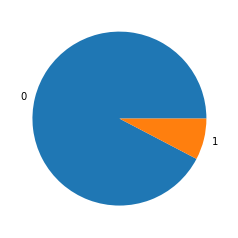

In [10]:
#준거변수 분포 확인(파이 그래프)
count = BT['RESPOND'].value_counts()   #frequancy를 series로 바꿈

import matplotlib.pyplot as plt
plt.pie(count[:],labels=count.index)

In [19]:
#데이터 분리(예측변수/준거변수) <- 실습에서는 나중에 하라고 하는데 나중에 명목변수 변환하느라 자료형이 array가 되어버려서 칼럼명 확인불가...그래서 지금함
X = BT.iloc[:,1:]
Y = BT.iloc[:,0]

#데이터 분리(학습/검증)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [12]:
#밑에서 명목변수 변환하게 칼럼명, 인덱스 확인하자
X_train.columns

Index(['AGE', 'INCOME', 'SEX', 'MARRIED', 'FICO', 'OWNHOME', 'LOC', 'CLIMATE',
       'BUY6', 'BUY12', 'BUY18', 'BUY24', 'ORGSRC', 'DISCBUY', 'RETURN24',
       'COA6'],
      dtype='object')

In [18]:
#학습 데이터 명목변수 -> 더미변수 변환
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
whatever = ColumnTransformer([('이게뭐지',OneHotEncoder(),[2,6,12]),],remainder='passthrough') 
#remaindrer = 'drop'이면 지정하지 않은 것은 날린다는 뜻

#명목변수가 변환된 새로운 데이터 생성
x_train = whatever.fit_transform(X_train)

In [14]:
#x_train이 어떻게 된거지 지금...?
print(type(x_train))
print(x_train[0])
x_train.shape

<class 'numpy.ndarray'>
[1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 48.0
 68.0 '1' 719.0 '0' 20 0 0 0 194 1 0 0]


(7000, 30)

In [15]:
X_train['SEX'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
#제대로 된거 맞아?
a = int(len(X_train['SEX'].unique()))    #sex의 집단 수
b = int(len(X_train['LOC'].unique()))    #loc의 집단 수
c = int(len(X_train['ORGSRC'].unique())) #어쩌구의 집단 수
before = int(len(X_train.iloc[0]))       #명목변수 변환 이전 칼럼 수
after = int(len(x_train[0]))             #변환 이후 칼럼 수

if before - 3 + a + b + c == after:
    print(True)
else:
    print(False)

In [ ]:
#SMOTE 전 비율 확인
print(sum(y_train==0))
print(sum(y_train==1))

In [ ]:
#학습 데이터 균형 맞추기
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
x_re, y_re = sm.fit_sample(x_train, y_train.ravel())

In [ ]:
#SMOTE 후 비율 확인
print(sum(y_re==0))
print(sum(y_re==1))

In [ ]:
#검증 데이터 명목변수 -> 더미변수 변환
whatever = ColumnTransformer([('이게뭐지',OneHotEncoder(),[2,6,12]),],remainder='passthrough') 
#remaindrer = 'drop'이면 지정하지 않은 것은 날린다는 뜻

#명목변수가 변환된 새로운 데이터 생성
x_test = whatever.fit_transform(X_test)

In [ ]:
#모델 1 생성(엔트로피)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

BT_ent = DecisionTreeClassifier(criterion='entropy', random_state=100)
BT_ent.fit(x_re, y_re)

In [ ]:
#모델 1 검증 데이터 적용
y_pred1 = BT_ent.predict(x_test)

In [ ]:
#모델 1 정확도 확인
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))

In [ ]:
#모델 2 생성(지니)
BT_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100)
BT_gini.fit(x_re, y_re)

In [ ]:
#모델 2 검증 데이터 적용
y_pred2 = BT_gini.predict(x_test)

In [ ]:
#모델 2 정확도 확인
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))

In [ ]:
#entropy를 사용한 모델 1이 더 정확한걸루 나타났다~! 와아~~!~~@@
#근데 모델에 문제점이 있다...바로 예측변수로 array만을 받는다는 것...(맞는지 아닌지 모름)